In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pypoptim.algorythm import Solution
from pypoptim.algorythm.ga import GA

# Simple example

In [3]:
def error(x):
    return np.sum(x**2)

class Sol(Solution):
    
    def update(self):
        self._y = error(self.x)
        
    def is_valid(self):
        return self.is_updated()

In [4]:
sol = Sol(2)
sol.update()
sol

Solution = {
    x    = 2,
    y    = 4,
    data = {}
}

In [5]:
bounds = np.array([[-4, 2],
                   [-1, 5]])

ga_optim = GA(Sol, bounds)
ga_optim

GA:
    bounds = [[-4  2]
 [-1  5]]
    gammas = [1 1]
    mask_log10_scale = [False False]
    mutation_rate   = 1.0
    crossover_rate  = 1.0
    selection_force = 2
    keys_data_transmit = []

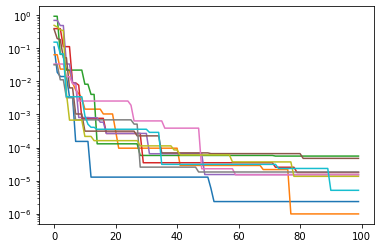

In [6]:
n_solutions = 25
n_elites = 5
n_epochs = 100

for _ in range(10):
    
    population = ga_optim.generate_population(n_solutions)

    loss = []

    for i in range(n_epochs):
        
        ga_optim.update_population(population)
            
        loss.append(min(population).y)
            
        elites  = ga_optim.get_elites(population, n_elites)
        mutants = ga_optim.get_mutants(population, n_solutions - n_elites)
        
        population = elites + mutants

    plt.semilogy(loss)

In [7]:
ga_optim.update_population(population)
x = np.array([sol.x for sol in sorted(population)])

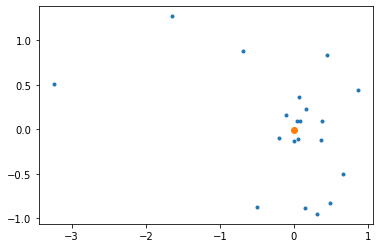

In [8]:
plt.plot(x[:, 0], x[:, 1], '.')
plt.plot(x[0, 0], x[0, 1], 'o')

# All at once

In [9]:
n_solutions = 5
n_elites = 1
n_epochs = 100

population = ga_optim.run(n_solutions, n_epochs, n_elites)
population

[Solution = {
     x    = [0.0201816  0.01588679],
     y    = 0.0006596873265606999,
     data = {}
 },
 Solution = {
     x    = [0.87346428 3.65238448],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [0.30326341 0.59791315],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [-0.44460783 -0.88508495],
     y    = None,
     data = {}
 },
 Solution = {
     x    = [ 0.9732333  -0.65300945],
     y    = None,
     data = {}
 }]